In [1]:
import pandas as pd

# Load the dataset
file_path = "./data/Improved_Supplier_Risk_Dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Total Price,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends_Increasing,Market Price Trends_Stable
0,Supplier_52,AI Software,12,1,99.847160,60,27669,4315,31984,0.125252,0.050000,0.732238,0,0
1,Supplier_93,Cloud Storage,36,0,99.584324,90,31538,746,32284,0.133811,0.177778,0.087773,1,0
2,Supplier_15,Database Management,36,1,99.976486,90,30065,2929,32994,0.025257,0.044444,0.668181,0,0
3,Supplier_72,Cybersecurity Suite,24,0,99.719919,45,30171,1490,31661,0.189155,0.222222,0.895812,1,0
4,Supplier_61,AI Software,36,1,99.577922,45,37696,3810,41506,0.026515,0.088889,0.057788,0,1


In [2]:

# Step 1: Check for missing values
missing_values = df.isnull().sum()
missing_values

Supplier                          0
Product                           0
Contract Length                   0
Compliance                        0
SLA                               0
Delivery Time (days)              0
Base Price                        0
Additional Fees                   0
Total Price                       0
Price Volatility                  0
Delivery Risk                     0
Contract Risk                     0
Market Price Trends_Increasing    0
Market Price Trends_Stable        0
dtype: int64

In [3]:

# Convert 'Contract Length' from '12 months' -> 12 (int)
df['Contract Length'] = df['Contract Length'].str.extract('(\d+)').astype(int)


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\neural_ninja\AppData\Local\Temp\ipykernel_25724\408877457.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Contract Length'] = df['Contract Length'].str.extract('(\d+)').astype(int)
C:\Users\neural_ninja\AppData\Local\Temp\ipykernel_25724\408877457.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['Contract Length'] = df['Contract Length'].str.extract('(\d+)').astype(int)


AttributeError: Can only use .str accessor with string values!

In [ ]:
df.head()


,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Total Price,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends
0,Mccoy PLC,Multi-Cloud Management,24,HIPAA,99.9%,90,35517,3536,39053,0.090496,0.203154,0.919603,Increasing
1,Taylor PLC,AI-Powered Security,24,FedRAMP,99.99%,60,28046,767,28813,0.036433,0.734384,0.686250,Decreasing
2,"Gibson, Rodriguez and Wade",Cloud Optimization,12,ISO 27001,99.95%,45,27684,1437,29121,0.067566,0.323530,0.856653,Increasing
3,Carey-Kelly,Multi-Cloud Management,24,HIPAA,99.9%,30,23743,1018,24761,0.066001,0.379299,0.771665,Increasing
4,"Powell, Gibbs and Sutton",AI-Powered Security,24,SOC2,99.99%,45,29221,2835,32056,0.028183,0.261287,0.751372,Decreasing


In [4]:

# Convert 'SLA' from text to float (99.9)
df['SLA'] = df['SLA'].str.rstrip('%').astype(float)
df.head()


AttributeError: Can only use .str accessor with string values!

In [5]:

# Convert 'Compliance' to binary: 1 if it has a value, 0 if 'None'
df['Compliance'] = df['Compliance'].apply(lambda x: 0 if x == "None" else 1)

# Display the updated dataframe
df.head()



,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Total Price,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends_Increasing,Market Price Trends_Stable
0,Supplier_52,AI Software,12,1,99.847160,60,27669,4315,31984,0.125252,0.050000,0.732238,0,0
1,Supplier_93,Cloud Storage,36,1,99.584324,90,31538,746,32284,0.133811,0.177778,0.087773,1,0
2,Supplier_15,Database Management,36,1,99.976486,90,30065,2929,32994,0.025257,0.044444,0.668181,0,0
3,Supplier_72,Cybersecurity Suite,24,1,99.719919,45,30171,1490,31661,0.189155,0.222222,0.895812,1,0
4,Supplier_61,AI Software,36,1,99.577922,45,37696,3810,41506,0.026515,0.088889,0.057788,0,1


In [6]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for 'Supplier' and 'Product'
label_encoders = {}

for col in ['Supplier', 'Product']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert to numeric values
    label_encoders[col] = le  # Store the encoders for inverse transformation if needed

# One-Hot Encoding for 'Market Price Trends'
df = pd.get_dummies(df, columns=['Market Price Trends'], drop_first=True)

# Display the updated dataframe
df.head()


KeyError: "None of [Index(['Market Price Trends'], dtype='object')] are in the [columns]"

In [7]:
# Convert boolean True/False to 1/0
df['Market Price Trends_Increasing'] = df['Market Price Trends_Increasing'].astype(int)
df['Market Price Trends_Stable'] = df['Market Price Trends_Stable'].astype(int)

# Display updated dataframe
df.head()


,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Total Price,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends_Increasing,Market Price Trends_Stable
0,48,0,12,1,99.847160,60,27669,4315,31984,0.125252,0.050000,0.732238,0,0
1,93,1,36,1,99.584324,90,31538,746,32284,0.133811,0.177778,0.087773,1,0
2,7,4,36,1,99.976486,90,30065,2929,32994,0.025257,0.044444,0.668181,0,0
3,70,2,24,1,99.719919,45,30171,1490,31661,0.189155,0.222222,0.895812,1,0
4,58,0,36,1,99.577922,45,37696,3810,41506,0.026515,0.088889,0.057788,0,1


In [8]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


Series([], dtype: int64)

In [9]:
# Display statistical summary
df.describe()


,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Total Price,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends_Increasing,Market Price Trends_Stable
count,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,49.416000,1.987000,29.892000,1.0,99.749790,56.940000,29897.420000,2773.401000,32670.821000,0.097127,0.158622,0.596599,0.388000,0.40600
std,29.503481,1.407413,13.572197,0.0,0.139298,21.945797,5844.021726,1304.838131,5870.349528,0.056946,0.152926,0.333330,0.487538,0.49133
min,0.000000,0.000000,12.000000,1.0,99.500989,30.000000,20001.000000,512.000000,21267.000000,0.000049,0.000000,0.000906,0.000000,0.00000
25%,23.000000,1.000000,12.000000,1.0,99.633018,45.000000,24878.500000,1607.000000,27565.250000,0.048225,0.022222,0.328876,0.000000,0.00000
50%,49.000000,2.000000,24.000000,1.0,99.753591,60.000000,29522.500000,2749.500000,32371.000000,0.096544,0.133333,0.599201,0.000000,0.00000
75%,75.000000,3.000000,48.000000,1.0,99.869835,90.000000,35162.250000,3939.250000,37841.250000,0.143400,0.233333,0.829833,1.000000,1.00000
max,99.000000,4.000000,48.000000,1.0,99.988835,90.000000,39989.000000,4992.000000,44699.000000,0.199781,0.633333,1.708918,1.000000,1.00000


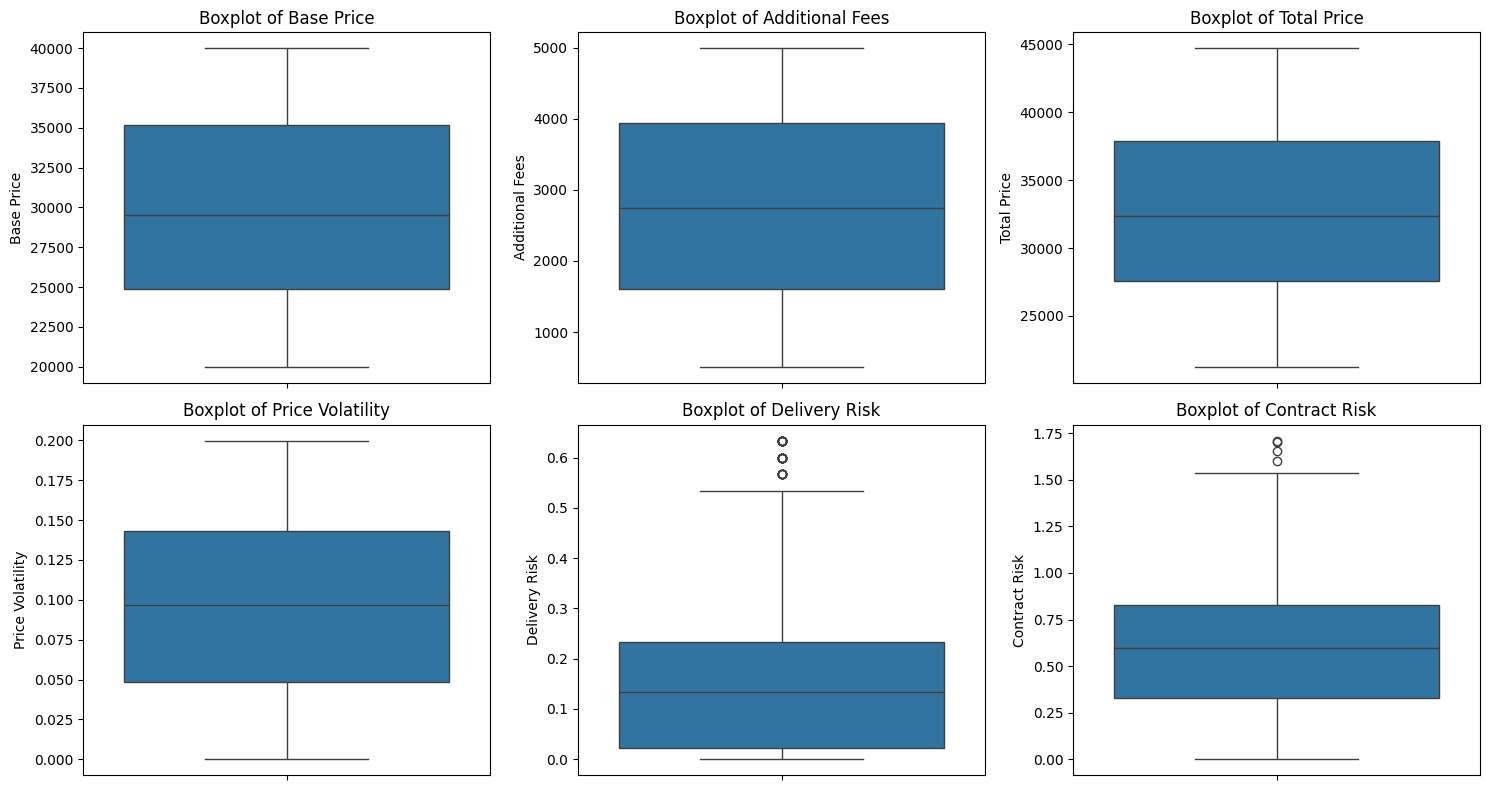

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical columns to check for outliers
numeric_cols = ['Base Price', 'Additional Fees', 'Total Price', 'Price Volatility', 'Delivery Risk', 'Contract Risk']

# Plot boxplots for numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define columns to apply different scalers
standardize_cols = ['Base Price', 'Additional Fees', 'Total Price']
minmax_cols = ['Price Volatility', 'Delivery Risk', 'Contract Risk']

# Apply Standard Scaler
standard_scaler = StandardScaler()
df[standardize_cols] = standard_scaler.fit_transform(df[standardize_cols])

# Apply MinMax Scaler
minmax_scaler = MinMaxScaler()
df[minmax_cols] = minmax_scaler.fit_transform(df[minmax_cols])

# Display the transformed dataset
df.head()


,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Total Price,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends_Increasing,Market Price Trends_Stable
0,48,0,12,1,99.847160,60,-0.381507,1.182040,-0.117057,0.626855,0.078947,0.428177,0,0
1,93,1,36,1,99.584324,90,0.280868,-1.554534,-0.065927,0.669707,0.280702,0.050859,1,0
2,7,4,36,1,99.976486,90,0.028690,0.119307,0.055080,0.126209,0.070175,0.390673,0,0
3,70,2,24,1,99.719919,45,0.046837,-0.984063,-0.172107,0.946801,0.350877,0.523946,1,0
4,58,0,36,1,99.577922,45,1.335122,0.794825,1.505805,0.132508,0.140351,0.033303,0,1


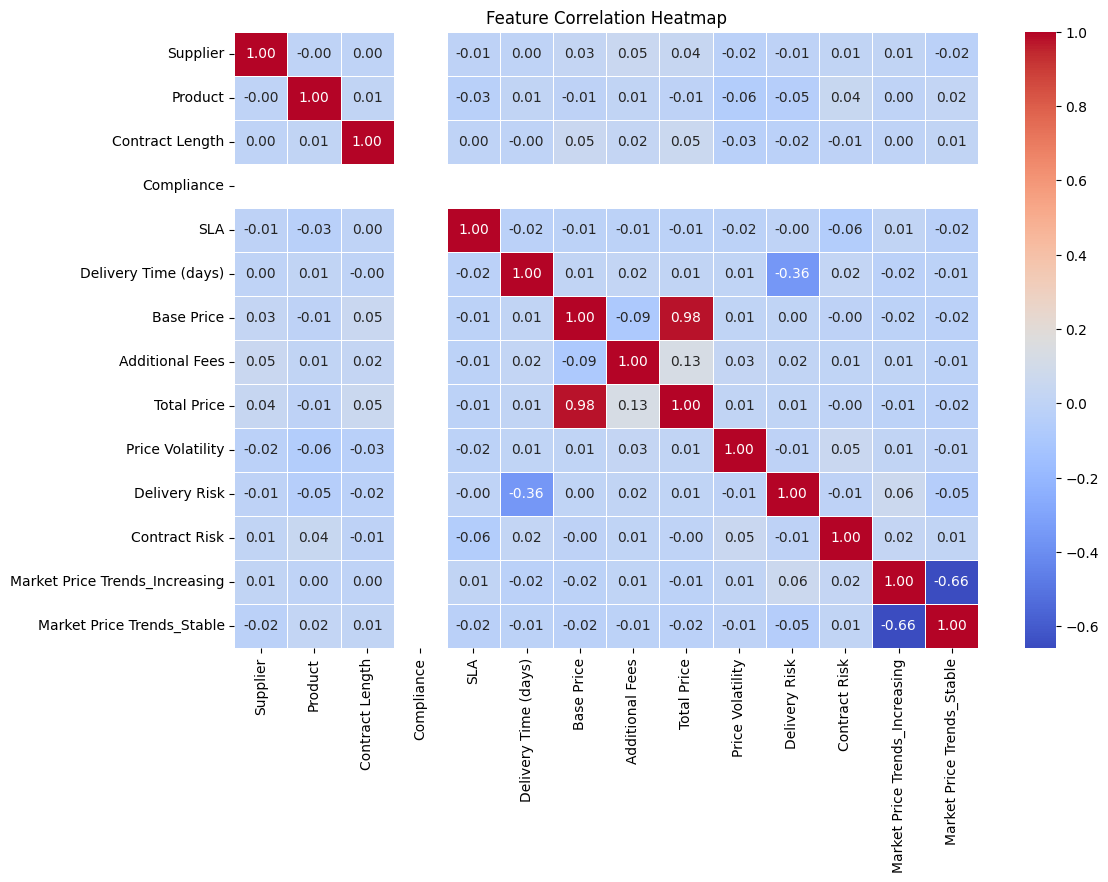

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [13]:
# Drop 'Total Price' as it is highly correlated with 'Base Price' & 'Additional Fees'
df.drop(columns=['Total Price'], inplace=True)

# Display the updated dataframe
df.head()


,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends_Increasing,Market Price Trends_Stable
0,48,0,12,1,99.847160,60,-0.381507,1.182040,0.626855,0.078947,0.428177,0,0
1,93,1,36,1,99.584324,90,0.280868,-1.554534,0.669707,0.280702,0.050859,1,0
2,7,4,36,1,99.976486,90,0.028690,0.119307,0.126209,0.070175,0.390673,0,0
3,70,2,24,1,99.719919,45,0.046837,-0.984063,0.946801,0.350877,0.523946,1,0
4,58,0,36,1,99.577922,45,1.335122,0.794825,0.132508,0.140351,0.033303,0,1


In [14]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding target labels)
numerical_cols = ['Base Price', 'Additional Fees', 'Contract Length', 'SLA', 
                  'Delivery Time (days)', 'Price Volatility']

# Initialize scaler
scaler = StandardScaler()

# Apply scaling to numerical features
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the updated dataframe
df.head()


,Supplier,Product,Contract Length,Compliance,SLA,Delivery Time (days),Base Price,Additional Fees,Price Volatility,Delivery Risk,Contract Risk,Market Price Trends_Increasing,Market Price Trends_Stable
0,48,0,-1.318943,1,0.699356,0.139504,-0.381507,1.182040,0.494131,0.078947,0.428177,0,0
1,93,1,0.450263,1,-1.188449,1.507193,0.280868,-1.554534,0.644503,0.280702,0.050859,1,0
2,7,4,0.450263,1,1.628230,1.507193,0.028690,0.119307,-1.262697,0.070175,0.390673,0,0
3,70,2,-0.434340,1,-0.214547,-0.544340,0.046837,-0.984063,1.616859,0.350877,0.523946,1,0
4,58,0,0.450263,1,-1.234427,-0.544340,1.335122,0.794825,-1.240593,0.140351,0.033303,0,1


In [15]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variables (Y)
X = df.drop(columns=['Price Volatility', 'Delivery Risk', 'Contract Risk'])  # Features
Y = df[['Price Volatility', 'Delivery Risk', 'Contract Risk']]  # Labels (Target variables)

# Split the data into 80% training and 20% testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Display dataset shapes
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((800, 10), (200, 10), (800, 3), (200, 3))

In [16]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor

# Initialize XGBoost regressor with default parameters
xgb_model = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror', 
                                                   n_estimators=100, 
                                                   learning_rate=0.1, 
                                                   max_depth=5, 
                                                   random_state=42))

# Train the model on training data
xgb_model.fit(X_train, Y_train)

# Predict on test data
Y_pred = xgb_model.predict(X_test)

# Display first 5 predictions
import pandas as pd
pd.DataFrame(Y_pred, columns=['Predicted Price Volatility', 'Predicted Delivery Risk', 'Predicted Contract Risk']).head()


,Predicted Price Volatility,Predicted Delivery Risk,Predicted Contract Risk
0,0.515916,0.142546,0.304703
1,-0.041858,0.376083,0.326806
2,-1.189920,0.137179,0.364330
3,0.441202,0.323624,0.341469
4,0.648498,0.283075,0.255437


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute performance metrics
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

# Print results
print(f"📌 Mean Absolute Error (MAE): {mae:.5f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.5f}")
print(f"📌 R² Score: {r2:.5f}")


📌 Mean Absolute Error (MAE): 0.42201
📌 Root Mean Squared Error (RMSE): 0.65725
📌 R² Score: -0.13273
